In [2]:
# Standard IPython notebook imports
%matplotlib inline

import os

from io import StringIO
import itertools
import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import scipy.stats as sstats
import scipy.optimize as sopt

import seaborn as sns

import sklearn.datasets
import sklearn.ensemble
import sklearn.svm
import sklearn.tree
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import cvxopt
sns.set_style('whitegrid')


# SVM Theory
A linear SVM assigns points $x^{(i)}\in\mathbb{R}^n$ to one of two
classes,  $y^{(i)}\in\{-1,1\}$ using the decision rule:

\begin{equation}
y = \text{signum}(w^T x + b).
\end{equation}

SVM training consists of finding weights $w\in\mathbb{R}^n$
and bias $b\in\mathbb{R}$ that maximize the separation margin. This
corresponds to solving the following quadratic optimization problem:

\begin{equation}
\begin{split}
  \min_{w,b,\xi}  &\frac{1}{2}w^Tw  + C\sum_{i=1}^m \xi_i  \\
  \text{s.t. } & y^{(i)}(w^T x^{(i)} + b) \geq 1- \xi_i\;\; \forall_i \\
  & \xi_i \geq 0 \;\; \forall_i.
\end{split}
\end{equation}

# 1. SVM on IRIS

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'petal_width')

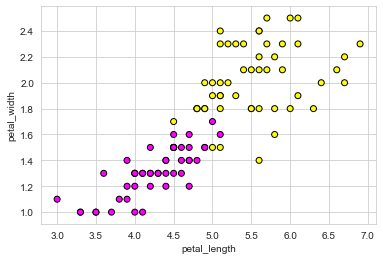

In [3]:
# load iris, extract petal_length and petal_width of versicolors and virginicas

iris = sklearn.datasets.load_iris()
print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

IrisX = np.array(iris.data.T)
IrisX = IrisX[:, iris.target!=0]

IrisX2F = np.vstack([petal_length, petal_width])
IrisX2F = IrisX2F[:, iris.target!=0]

# Set versicolor=0 and virginia=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

plt.scatter(IrisX2F[0,:], IrisX2F[1,:], c=IrisY.ravel(),
            cmap='spring', edgecolors='k')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

## 1.1 Linear SVM

In [11]:
svm_model = sklearn.svm.SVC(gamma='auto', kernel='linear', C=60)
svm_model.fit(IrisX2F.T, IrisY.T.ravel())

print("libsvm error rate: %f" % (svm_model.predict(IrisX2F.T)!=IrisY).mean())

libsvm error rate: 0.060000


## 1.2 Decision boundary

Text(0.5, 1.0, 'Decision boundary found by libsvm')

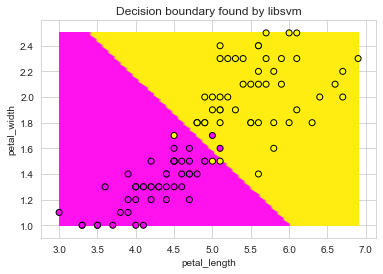

In [12]:
petal_lengths, petal_widths = np.meshgrid(np.linspace(IrisX2F[0,:].min(), IrisX2F[0,:].max(), 100),
                                          np.linspace(IrisX2F[1,:].min(), IrisX2F[1,:].max(), 100))

IrisXGrid = np.vstack([petal_lengths.ravel(), petal_widths.ravel()])
predictions_Grid = svm_model.predict(IrisXGrid.T)

plt.contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')

plt.scatter(IrisX2F[0,:], IrisX2F[1,:], c=IrisY.ravel(),
            cmap='spring', edgecolors='k')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Decision boundary found by libsvm')

## 1.3 Plot only support vectors with size equal to their coefficients

[[-60.         -43.22351664 -60.         -60.         -60.
  -60.          60.          60.          60.           7.52074002
   60.          35.70277661  60.        ]]


Text(0.5, 1.0, 'Decision boundary found by libsvm')

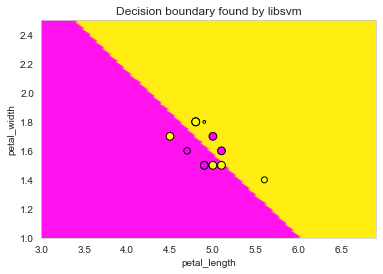

In [14]:
support_vector_indices = svm_model.support_
support_vector_coefficients = svm_model.dual_coef_
print(support_vector_coefficients)

plt.contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
plt.scatter(IrisX2F[0,support_vector_indices], IrisX2F[1,support_vector_indices],
            c=IrisY.ravel()[support_vector_indices],
            s=abs(support_vector_coefficients),
            cmap='spring',
            edgecolors='k')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Decision boundary found by libsvm')

## 1.4 Nonlinear SVM with Gaussian kernel

libsvm error rate: 0.010000


Text(0.5, 1.0, 'Decision boundary found by libsvm')

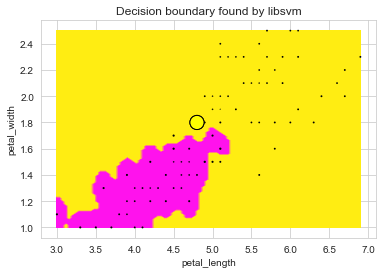

In [16]:
svm_gauss_model = sklearn.svm.SVC(gamma=100, kernel='rbf', C=200)
svm_gauss_model.fit(IrisX2F.T, IrisY.T.ravel())

print("libsvm error rate: %f" % (svm_gauss_model.predict(IrisX2F.T)!=IrisY).mean())

predictions_Grid = svm_gauss_model.predict(IrisXGrid.T)

support_vector_indices = svm_gauss_model.support_
support_vector_coefficients = svm_gauss_model.dual_coef_

# TODO: plot the decision boundary with support vectors
plt.contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
plt.scatter(IrisX2F[0,support_vector_indices], IrisX2F[1,support_vector_indices],
            c=IrisY.ravel()[support_vector_indices],
            s=abs(support_vector_coefficients),
            cmap='spring',
            edgecolors='k')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Decision boundary found by libsvm')

In [ ]:
#
# Now solve the SVM using the QP solver
#

n, m = IrisX2F.shape
C=10.0

P = np.zeros((n+1+m, n+1+m)) #w, bias, xi
q = np.zeros((n+1+m,1)) 
G = np.zeros((2*m, n+1+m)) # we have two constrains for each data point: 
                           # that the margin is equal to 1-xi
                           # and that xi is nonnegative
h = np.zeros((2*m,1))
#
# TODO: fill in P, q, G, h
#

TODO

#
# Now run the solver
#
ret  = cvxopt.solvers.qp(cvxopt.matrix(P), cvxopt.matrix(q), 
                         cvxopt.matrix(G), cvxopt.matrix(h), )

ret = np.array(ret['x'])

#
# extract the weights and biases
#
W = ret[:n].reshape(-1,1)
b = ret[n]

#
# Extract the weight and bias from libsvm for comparison
#
Wlibsvm = TODO
blibsvm = TODO

print('W', W.T, 'Wlibsvm', Wlibsvm)
print('b', b, 'blibsvm', blibsvm)

     pcost       dcost       gap    pres   dres
 0: -8.2045e+03  4.6654e+03  2e+04  2e+01  3e+00
 1:  5.3426e+01 -5.8951e+02  3e+03  2e+00  4e-01
 2:  1.7058e+02 -1.9137e+01  4e+02  3e-01  5e-02
 3:  1.4063e+02  7.5166e+01  1e+02  7e-02  1e-02
 4:  1.3820e+02  9.8722e+01  6e+01  3e-02  5e-03
 5:  1.4016e+02  1.1207e+02  3e+01  4e-03  8e-04
 6:  1.3507e+02  1.1797e+02  2e+01  1e-03  2e-04
 7:  1.2551e+02  1.2356e+02  2e+00  2e-04  3e-05
 8:  1.2445e+02  1.2440e+02  5e-02  4e-06  6e-07
 9:  1.2442e+02  1.2442e+02  1e-03  9e-08  2e-08
10:  1.2442e+02  1.2442e+02  2e-05  1e-09  1e-10
Optimal solution found.
W [[2.75844069 4.827271  ]] Wlibsvm [[2.75873306 4.82861713]]
b [-21.2054472] blibsvm [-21.20914737]


# Problem 3 [2p]

Repeat 100 bootstrap experiments to establish the effect of constant $C$ on SVM.

For each experiment do the following:

1. Sample (with replacement) a bootstrap dataset equal in size to the
    training dataset. This will be this experiment's training dataset.
2. Prepare the experiment's testing dataset by using samples not
    inluded in the bootstrap dataset.
3. For all $C$ from the set $\{10^{-4}, 10^{-3.5}, 10^{-3.}, \ldots, 10^{6}\}$
    fit a nonlinear SVM (Gaussian kernel, called \texttt{rbf} in
    LIBSVM using the default $\gamma$) and record the training and
    testing errors.

Analyze a box plot of errors as a function of $C$. Can you see its
influence on the training and testing error, as well as on the
testing error variability? 

**Indicate regions of overfitting and underfitting.**



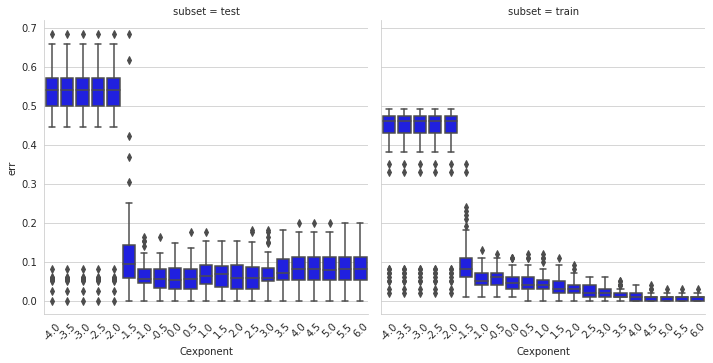

In [83]:
res = []
iters = 100
for rep in range(iters):
    bootstrap_sel = resample(np.arange(len(IrisX.T)), n_samples = len(IrisX.T))
    test_sel = np.array([i for i in np.arange(len(IrisX.T)) if not i in bootstrap_sel])

    bootstrap_IrisX = IrisX2F[:,bootstrap_sel].T
    bootstrap_IrisY = IrisY[:,bootstrap_sel].T
    
    test_IrisX = IrisX2F[:,test_sel].T
    test_IrisY = IrisY[:,test_sel].T
    
    #
    # TODO: Loop over a list of exponents.
    #
    for Cexponent in np.arange(-4, 6.5, 0.5):
        C = 10.0**Cexponent
        svm_model = sklearn.svm.SVC(gamma='auto', kernel='rbf', C=C)
        svm_model.fit(bootstrap_IrisX, bootstrap_IrisY.ravel())
        train_acc = (svm_model.predict(bootstrap_IrisX) == bootstrap_IrisY.ravel()).mean()
        test_acc = (svm_model.predict(test_IrisX) == test_IrisY.ravel()).mean()

        # VISUALIZATION
        # predictions_Grid = svm_model.predict(IrisXGrid.T)
        # plt.contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
        # plt.scatter(bootstrap_IrisX[:, 0], bootstrap_IrisX[:, 1],
        #     c=svm_model.predict(bootstrap_IrisX),
        #     cmap='spring',
        #     edgecolors='black')
        # plt.show()
        # print(train_acc, test_acc)
  
        res.append(dict(Cexponent=Cexponent, err=1-test_acc, subset='test'))
        res.append(dict(Cexponent=Cexponent, err=1-train_acc, subset='train'))

res = pd.DataFrame(res)
chart = sns.catplot(kind='box', x='Cexponent', y='err', col='subset', 
            color='blue', data=res)
chart.set_xticklabels(rotation=45)

# Problem 4 [3p bonus]

Implement a nonlinear SVM by solving the dual problem using the Quadratic Programming solver. Compare results with LIBSVM.

Please see [page 20 if CS229 lecture notes](http://cs229.stanford.edu/notes/cs229-notes3.pdf) for problem formulation.

# Problem 5 [2p bonus]
Compare two ways to implement a multi-class
SVM: by training ``1-vs-1'' classifier for each class combination,
and by training a ``1-vs-rest'' classifier for each clas. See
http://www.csie.ntu.edu.tw/\~cjlin/papers/multisvm.pdf for
details.


# Problem 6 [4p bonus]

Implement a Kernelized linear regression. Train it on Iris using a Gaussian kernel. Compare to the non-linear SVM.